In [47]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Crippen as logp
from rdkit.Chem import rdMolDescriptors as tpsa
from rdkit.Chem import QED as QED
import seaborn as sns
from chainer_chemistry.datasets.molnet import get_molnet_dataset

In [52]:
with open ("./../../../data/trainingsets/image.pickle", 'rb') as f:
    X_smiles000, SMILES000, gap000 = pickle.load(f)

bad_mw = pd.read_csv ('bad_mw.csv')
bad_mw00 = bad_mw['0'].values.tolist()

In [55]:
with open ("./../../../data/trainingsets/60000_train_regular_pubqc/image_train.pickle", 'rb') as f:
    X_smile, SMILE, ga = pickle.load(f)

In [49]:
bad_mw00 = np.array (bad_mw00)
bad_mw0 = np.repeat(bad_mw00, 10)
bad_mw0.shape

(7270,)

In [58]:
np.mean (gap000)

5.942063186780872

In [57]:
np.mean (ga)

5.941219050583878

<Axes: ylabel='Count'>

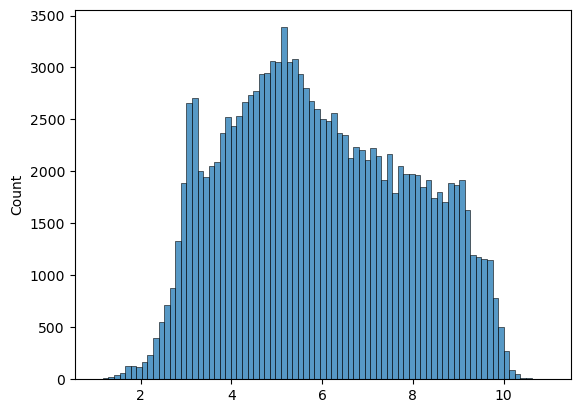

In [53]:
sns.histplot(gap000)

In [64]:
SMILES000[gap000>10]

array(['CCCCCCCC.', 'N#N.', 'C1CC1.', 'CC(C)C.', 'CCC(C)C.', 'CCCC(C)C.',
       'CCCCCC.', 'C1CCC1.', 'C1CCCC1.', 'CC(C)(C)C.', 'C1CC2CC1C2.',
       'CC12CC(C1)C2.', 'C1C2C3CC2C13.', 'CC1C2CC1C2.', 'CC1C2CC1C2C.',
       'C1CO1.', 'C1OCOCO1.', 'CC(C)C(C)(C)C.', 'CCC(C)(C)CC.',
       'CCCC(C)(C)CC.', 'CC1CCC(C)CC1.', 'CCCCC(C)(C)C.',
       'CCCCCCCCCCCCCC.', 'CCCCCCCCCCCCC(C)C.', 'CCCC1CCCC1.',
       'CCCC(CC)CCC.', 'CCC1CCC(C)CC1.', 'CCCCCC(C)CCC.',
       'COC(OC)(OC)OC.', 'CC(C)CC1CCCC1.', 'CCCCCC(CC)CC.',
       'CCCCC(C)(C)CCC.', 'CCC(CC)C(CC)CC.', 'CCCCCCCC(C)CC.',
       'CCCCCCCCCC(C)CCCC.', 'CCCCCCCCCC(C)CCC.', 'C1CCCCCCCCCC1.',
       'CCCC(C)(C)CCC.', 'CCCC1CCC1.', 'CCC1CCCCCC1.', 'CCCC(C)CCC(C)C.',
       'CCCC(C)C(C)CCC.', 'CCCCCCCC(C)(C)C.', 'CC1CC(C)C1.',
       'CCCCCCCCCCCCCCC.', 'CC(C)CCCCCCC(C)C.', 'CCCCCCC(C)CC(C)C.',
       'CC(C)CC1CCC(C)C1.', 'CCCC1CCC(C)CC1.', 'CC1CCCC(C)CCC1.',
       'CC1CCCCCCCC1.', 'CCC(C)CCCCCC(C)C.', 'CCCCCC(C)CC(C)CC.',
       'CCCC(C

In [32]:
X_smiles00 = np.concatenate ((X_smiles000, X_smiles000[bad_mw0]))
SMILES00 = np.concatenate ((SMILES000, SMILES000[bad_mw0]))
gap00 = np.concatenate ((gap000, gap000[bad_mw0]))

gap00.shape

(139896,)

In [37]:
SMILES = []
for smile in SMILES00:
    SMILES.append(smile[:-1])

SMILES = np.array(SMILES)

In [38]:
print (SMILES[1])
m = AllChem.MolFromSmiles(SMILES[1])
output = Chem.MolToMolBlock(m)

print ("this is output: ", output)
print ("this is re.sub", re.sub('[\W+\d+H]', '', SMILES[1]))
print (len(re.sub('[\W+\d+H]', '', SMILES[1])))
print ("this is m: ", m)
m

coord = np.array([a.split()[:3] for a in output.split('\n')[4:(4+9)]]).astype(float)
print ("this is 2D coordinates", coord)

O=C(O)C=C(CC(=O)O)C(=O)O
this is output:  
     RDKit          2D

 12 11  0  0  0  0  0  0  0  0999 V2000
   -1.2990    2.2500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5981    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8971    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8971    2.2500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    5.1962   -0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    2.2500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    3.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981    3.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  2  4  1  0
  4  5  2  3
 

In [39]:
features = {
    'MolWt': Descriptors.MolWt,
    'HeavyAtomCount': Descriptors.HeavyAtomCount,
    'HeavyAtomMolWt': Descriptors.HeavyAtomMolWt,
    'NumHAcceptors': Descriptors.NumHAcceptors,
    'NumHDonors': Descriptors.NumHDonors,
    'NumHeteroatoms': Descriptors.NumHeteroatoms,
    'NumRotatableBonds': Descriptors.NumRotatableBonds,
    'NumValenceElectrons': Descriptors.NumValenceElectrons,
    'NumAromaticRings': Descriptors.NumAromaticRings,
    'NumSaturatedRings': Descriptors.NumSaturatedRings,
    'NumAliphaticRings': Descriptors.NumAliphaticRings,
    'NumRadicalElectrons': Descriptors.NumRadicalElectrons,
    'NumAliphaticCarbocycles': Descriptors.NumAliphaticCarbocycles,
    'NumAliphaticHeterocycles': Descriptors.NumAliphaticHeterocycles,
    'NumAromaticCarbocycles': Descriptors.NumAromaticCarbocycles,
    'NumAromaticHeterocycles': Descriptors.NumAromaticHeterocycles,
    'NumSaturatedCarbocycles': Descriptors.NumSaturatedCarbocycles,
    'NumSaturatedHeterocycles': Descriptors.NumSaturatedHeterocycles,
    'Logp': logp.MolLogP,
    'TPSA': tpsa.CalcTPSA,
    'QED' : QED.default
}

out_data = {}
for f in features.keys():
    out_data[f] = []

for i, smiles in enumerate(SMILES):
    
    if (i + 1) % 5000 == 0:
        print('Currently processed: {}/{}'.format(i+1, len(SMILES)))
    
    m = AllChem.MolFromSmiles(smiles)
    
    for k, v in features.items():
        out_data[k].append(v(m))

Currently processed: 5000/139896
Currently processed: 10000/139896
Currently processed: 15000/139896
Currently processed: 20000/139896
Currently processed: 25000/139896
Currently processed: 30000/139896
Currently processed: 35000/139896
Currently processed: 40000/139896
Currently processed: 45000/139896
Currently processed: 50000/139896
Currently processed: 55000/139896
Currently processed: 60000/139896
Currently processed: 65000/139896
Currently processed: 70000/139896
Currently processed: 75000/139896
Currently processed: 80000/139896
Currently processed: 85000/139896
Currently processed: 90000/139896
Currently processed: 95000/139896
Currently processed: 100000/139896
Currently processed: 105000/139896
Currently processed: 110000/139896
Currently processed: 115000/139896
Currently processed: 120000/139896
Currently processed: 125000/139896
Currently processed: 130000/139896
Currently processed: 135000/139896


In [40]:
out_data['gap'] = gap00
out_data['SMILES'] = SMILES
out_data = pd.DataFrame(out_data)
out_data.to_csv('Features_gap_pubchemqc.csv', index = False)